In [66]:
import os
from glob import glob
from ultralytics import YOLO as yolo

import cv2
import pandas as pd
import numpy as np
from functools import reduce
from xml.etree import ElementTree as et
from config import region
from shutil import move
from IPython.display import Image, display

In [67]:
src_path = region + '/data/data_images'
xml_list = glob(src_path + '/*.xml')
xml_list = list(map(lambda x: x.replace('\\','/'), xml_list))

In [68]:
tree = et.parse(xml_list[0])
root = tree.getroot()

print(root)
print(root.tag)

image_name = root.find('filename').text
print(image_name)

<Element 'annotation' at 0x17ccf5a40>
annotation
007826.jpg


In [69]:
width = root.find('size').find('width').text
height = root.find('size').find('height').text
print(width + ' x ' + height)

500 x 375


In [70]:
objs = root.findall('object')
objs

[<Element 'object' at 0x17cdb8c20>,
 <Element 'object' at 0x17cdb8540>,
 <Element 'object' at 0x17cdb85e0>,
 <Element 'object' at 0x17cdbbf40>,
 <Element 'object' at 0x17cdbb270>,
 <Element 'object' at 0x17cdbb5e0>,
 <Element 'object' at 0x17cdbb9f0>]

In [71]:
parser=[]
for obj in objs:
    name = obj.find('name').text
    bndbox = obj.find('bndbox')
    xmin = bndbox.find('xmin').text
    xmax = bndbox.find('xmax').text
    ymin = bndbox.find('ymin').text
    ymax = bndbox.find('ymax').text
    parser.append([image_name, width, height, name, xmin, ymin, xmax, ymax])
print(parser)

[['007826.jpg', '500', '375', 'diningtable', '80', '217', '320', '273'], ['007826.jpg', '500', '375', 'chair', '197', '193', '257', '326'], ['007826.jpg', '500', '375', 'chair', '139', '184', '185', '231'], ['007826.jpg', '500', '375', 'chair', '258', '180', '312', '314'], ['007826.jpg', '500', '375', 'chair', '10', '195', '93', '358'], ['007826.jpg', '500', '375', 'chair', '82', '252', '243', '372'], ['007826.jpg', '500', '375', 'chair', '43', '319', '144', '375']]


In [72]:
parse_all = reduce(lambda x, y: x+y, parser)
print(parse_all)

['007826.jpg', '500', '375', 'diningtable', '80', '217', '320', '273', '007826.jpg', '500', '375', 'chair', '197', '193', '257', '326', '007826.jpg', '500', '375', 'chair', '139', '184', '185', '231', '007826.jpg', '500', '375', 'chair', '258', '180', '312', '314', '007826.jpg', '500', '375', 'chair', '10', '195', '93', '358', '007826.jpg', '500', '375', 'chair', '82', '252', '243', '372', '007826.jpg', '500', '375', 'chair', '43', '319', '144', '375']


In [73]:
df = pd.DataFrame(parser, columns=['filename', 'width', 'height', 'name', 'xmin', 'ymin', 'xmax', 'ymax'])
df.head()

,filename,width,height,name,xmin,ymin,xmax,ymax
0,007826.jpg,500,375,diningtable,80,217,320,273
1,007826.jpg,500,375,chair,197,193,257,326
2,007826.jpg,500,375,chair,139,184,185,231
3,007826.jpg,500,375,chair,258,180,312,314
4,007826.jpg,500,375,chair,10,195,93,358


In [74]:
df.shape

(7, 8)

In [75]:
parser1=[]
for img_details in xml_list:
    tree1 = et.parse(img_details)
    root1 = tree1.getroot()
    objs1 = root1.findall('object')
    image_name1 = root1.find('filename').text
    width1 = root1.find('size').find('width').text
    height1 = root1.find('size').find('height').text
    for obj1 in objs1:
        name1 = obj1.find('name').text
        bndbox1 = obj1.find('bndbox')
        xmin1 = bndbox1.find('xmin').text
        xmax1 = bndbox1.find('xmax').text
        ymin1 = bndbox1.find('ymin').text
        ymax1 = bndbox1.find('ymax').text
        parser1.append([image_name1, width1, height1, name1, xmin1, ymin1, xmax1, ymax1])
df = pd.DataFrame(parser1, columns=['filename', 'width', 'height', 'name', 'xmin', 'ymin', 'xmax', 'ymax'])

In [76]:
df.head(15)

,filename,width,height,name,xmin,ymin,xmax,ymax
0,007826.jpg,500,375,diningtable,80,217,320,273
1,007826.jpg,500,375,chair,197,193,257,326
2,007826.jpg,500,375,chair,139,184,185,231
3,007826.jpg,500,375,chair,258,180,312,314
4,007826.jpg,500,375,chair,10,195,93,358
5,007826.jpg,500,375,chair,82,252,243,372
6,007826.jpg,500,375,chair,43,319,144,375
7,002786.jpg,500,332,horse,80,97,348,272
8,002786.jpg,500,332,person,201,52,258,202
9,006286.jpg,500,375,person,80,88,405,375


In [77]:
df.shape

(15663, 8)

In [78]:
len(xml_list)

5012

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15663 entries, 0 to 15662
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  15663 non-null  object
 1   width     15663 non-null  object
 2   height    15663 non-null  object
 3   name      15663 non-null  object
 4   xmin      15663 non-null  object
 5   ymin      15663 non-null  object
 6   xmax      15663 non-null  object
 7   ymax      15663 non-null  object
dtypes: object(8)
memory usage: 979.1+ KB


In [80]:
cols = ['width', 'height', 'xmin', 'ymin', 'xmax', 'ymax']
df[cols] = df[cols].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15663 entries, 0 to 15662
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  15663 non-null  object
 1   width     15663 non-null  int64 
 2   height    15663 non-null  int64 
 3   name      15663 non-null  object
 4   xmin      15663 non-null  int64 
 5   ymin      15663 non-null  int64 
 6   xmax      15663 non-null  int64 
 7   ymax      15663 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 979.1+ KB


In [81]:
df['center_x'] = (df['xmin'] + df['xmax']/2)/df['width']
df['center_y'] = (df['ymin'] + df['ymax']/2)/df['height']

df['width'] = (df['xmax'] - df['xmin']) / df['width']
df['height'] = (df['ymax'] - df['ymin']) / df['height']

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15663 entries, 0 to 15662
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   filename  15663 non-null  object 
 1   width     15663 non-null  float64
 2   height    15663 non-null  float64
 3   name      15663 non-null  object 
 4   xmin      15663 non-null  int64  
 5   ymin      15663 non-null  int64  
 6   xmax      15663 non-null  int64  
 7   ymax      15663 non-null  int64  
 8   center_x  15663 non-null  float64
 9   center_y  15663 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 1.2+ MB


In [83]:
images = df['filename'].unique()
len(images)

5012

In [84]:
img_df = pd.DataFrame(images, columns=['filename'])
img_df

,filename
0,007826.jpg
1,002786.jpg
2,006286.jpg
3,002962.jpg
4,008297.jpg
...,...
5007,005782.jpg
5008,000822.jpg
5009,004488.jpg
5010,005796.jpg


In [85]:
img_train = tuple(img_df.sample(frac=0.8)['filename'])
len(img_train)

4010

In [86]:
img_test = tuple(img_df.query(f'filename not in {img_train}')['filename'])
len(img_test)

1002

In [87]:
train_df = df.query('filename in @img_train')
test_df = df.query('filename in @img_test')

In [88]:
train_df.shape

(12549, 10)

In [89]:
test_df.shape

(3114, 10)

In [90]:
#Label encoding
def label_encoding(x):
    labels = {'person' : 0, 'car':1, 'chair': 2, 'bottle': 3, 'pottedplant':4, 'bird': 5, 'dog': 6,     'sofa':7, 'bicycle':8, 'horse':9, 'boat': 10, 'motorbike': 11, 'cat':12, 'tvmonitor':13, 'cow':14, 'sheep': 15, 'aeroplane': 16, 'train': 17, 'diningtable': 18, 'bus':19}
    return labels [x]

In [100]:
train_df.loc[:, 'id'] = train_df['name'].apply(label_encoding)

In [101]:
test_df.loc[:, 'id'] = test_df['name'].apply(label_encoding)

In [102]:
train_df.head(10)

,filename,width,height,name,xmin,ymin,xmax,ymax,center_x,center_y,id
0,007826.jpg,0.480,0.149333,diningtable,80,217,320,273,0.480,0.942667,18
1,007826.jpg,0.120,0.354667,chair,197,193,257,326,0.651,0.949333,2
2,007826.jpg,0.092,0.125333,chair,139,184,185,231,0.463,0.798667,2
3,007826.jpg,0.108,0.357333,chair,258,180,312,314,0.828,0.898667,2
4,007826.jpg,0.166,0.434667,chair,10,195,93,358,0.113,0.997333,2
5,007826.jpg,0.322,0.320000,chair,82,252,243,372,0.407,1.168000,2
6,007826.jpg,0.202,0.149333,chair,43,319,144,375,0.230,1.350667,2
7,002786.jpg,0.536,0.527108,horse,80,97,348,272,0.508,0.701807,9
8,002786.jpg,0.114,0.451807,person,201,52,258,202,0.660,0.460843,0
29,002962.jpg,0.140,0.251497,tvmonitor,430,121,500,205,1.360,0.669162,13


In [103]:
test_df.head(10)

,filename,width,height,name,xmin,ymin,xmax,ymax,center_x,center_y,id
9,006286.jpg,0.650,0.765333,person,80,88,405,375,0.565,0.734667,0
10,006286.jpg,0.078,0.165333,person,436,147,475,209,1.347,0.670667,0
11,006286.jpg,0.094,0.122667,person,381,145,428,191,1.190,0.641333,0
12,006286.jpg,0.196,0.416000,diningtable,402,219,500,375,1.304,1.084000,18
13,006286.jpg,0.116,0.104000,diningtable,347,177,405,216,1.099,0.760000,18
14,006286.jpg,0.086,0.056000,diningtable,160,167,203,188,0.523,0.696000,18
15,006286.jpg,0.210,0.250667,diningtable,104,185,209,279,0.417,0.865333,18
16,006286.jpg,0.162,0.141333,diningtable,1,322,82,375,0.084,1.358667,18
17,006286.jpg,0.102,0.149333,diningtable,2,169,53,225,0.057,0.750667,18
18,006286.jpg,0.184,0.357333,chair,408,241,500,375,1.316,1.142667,2


In [104]:
os.makedirs('../data_image', exist_ok=True)

train_folder = 'data_image/train'
test_folder = 'data_image/test'

os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

In [105]:
cols = ['filename', 'id','center_x', 'center_y', 'width', 'height']
groupby_obj_train = train_df[cols].groupby('filename')
groupby_obj_test = test_df[cols].groupby('filename')

In [106]:
groupby_obj_train.groups

{'000001.jpg': [14171, 14172, 14173, 14174], '000002.jpg': [15211, 15212], '000007.jpg': [12213], '000009.jpg': [2687, 2688, 2689, 2690], '000012.jpg': [12332], '000016.jpg': [15221], '000017.jpg': [15237, 15238], '000019.jpg': [1566, 1567], '000020.jpg': [2583], '000021.jpg': [2596, 2597, 2598, 2599], '000023.jpg': [3573, 3574, 3575, 3576, 3577, 3578], '000024.jpg': [1658], '000030.jpg': [1682, 1683, 1684], '000032.jpg': [437, 438, 439, 440], '000033.jpg': [599, 600, 601], '000034.jpg': [2557, 2558], '000035.jpg': [2663, 2664, 2665, 2666], '000036.jpg': [3610], '000039.jpg': [13177], '000041.jpg': [7392, 7393, 7394], '000042.jpg': [6342, 6343], '000046.jpg': [5350], '000047.jpg': [5445, 5446], '000048.jpg': [11447, 11448], '000050.jpg': [4555, 4556, 4557, 4558, 4559, 4560, 4561, 4562, 4563, 4564], '000051.jpg': [4459, 4460, 4461], '000052.jpg': [5342, 5343, 5344, 5345, 5346, 5347], '000063.jpg': [10466, 10467], '000066.jpg': [9517, 9518, 9519], '000072.jpg': [9555, 9556], '000073.jpg'

In [111]:
groupby_obj_train.get_group('000001.jpg')

,filename,id,center_x,center_y,width,height
14171,000001.jpg,1,0.160645,0.907154,0.280273,0.284627
14172,000001.jpg,1,0.541504,0.897260,0.294922,0.219178
14173,000001.jpg,1,0.879883,0.863014,0.289062,0.164384
14174,000001.jpg,1,1.185059,0.840183,0.292969,0.159817


In [118]:
groupby_obj_test.get_group('006286.jpg')

,filename,id,center_x,center_y,width,height
9,006286.jpg,0,0.565,0.734667,0.650,0.765333
10,006286.jpg,0,1.347,0.670667,0.078,0.165333
11,006286.jpg,0,1.190,0.641333,0.094,0.122667
12,006286.jpg,18,1.304,1.084000,0.196,0.416000
13,006286.jpg,18,1.099,0.760000,0.116,0.104000
14,006286.jpg,18,0.523,0.696000,0.086,0.056000
15,006286.jpg,18,0.417,0.865333,0.210,0.250667
16,006286.jpg,18,0.084,1.358667,0.162,0.141333
17,006286.jpg,18,0.057,0.750667,0.102,0.149333
18,006286.jpg,2,1.316,1.142667,0.184,0.357333


In [119]:
groupby_obj_test.get_group('006286.jpg').set_index('filename').to_csv('data_image/test/test_006286.csv')

In [120]:
def save_data(filename, folder_path, group_obj):
    src = os.path.join(src_path, filename)
    dst = os.path.join(folder_path, filename)
    move(src, dst)

    file_name = os.path.join(folder_path, os.path.splitext(filename)[0] + '.csv')
    group_obj.get_group(filename).set_index('filename').to_csv(file_name, sep='', index=False, header=False)

In [121]:
filename_train_series = pd.Series(groupby_obj_train.groups.keys())
filename_test_series = pd.Series(groupby_obj_test.groups.keys())

In [122]:
filename_train_series

0       000001.jpg
1       000002.jpg
2       000007.jpg
3       000009.jpg
4       000012.jpg
           ...    
4005    009954.jpg
4006    009955.jpg
4007    009958.jpg
4008    009959.jpg
4009    009961.jpg
Length: 4010, dtype: object

In [123]:
filename_test_series

0       000026.jpg
1       000044.jpg
2       000060.jpg
3       000061.jpg
4       000064.jpg
           ...    
997     009898.jpg
998     009904.jpg
999     009918.jpg
1000    009932.jpg
1001    009945.jpg
Length: 1002, dtype: object

##### For Python 3.10+ users use following command to train yolo model from scratch

In [125]:
#!python 01_extract_object_info_from_xml.py --data data.yaml --weights yolov5s.pt --batch-size 8 --name Model --img 640 --epochs 150

##### Resuming training command

In [126]:
#!python 01_extract_object_info_from_xml.py --data data.yaml --weights runs/train/Model/weights/best.pt --batch-size 8 --name Model --img 640 --epochs 150

##### Exporting model into OpenCV's onnx file

In [127]:
#!python export.py --weights runs/train/Model/weights/best.pt --include onnx --simplify --opset 12

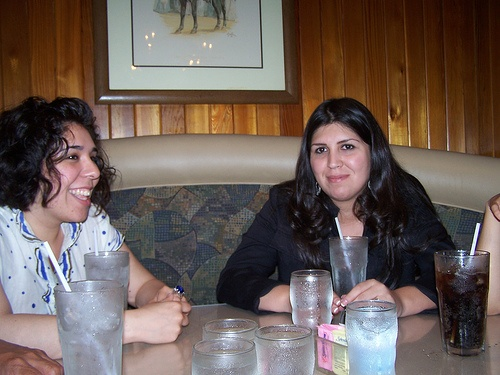

In [128]:
display(Image(filename = src_path + '/000035.jpg'))

In [129]:
image = cv2.imread(src_path + '/000035.jpg')

row, col, d = image.shape
max_rc = max(row, col)

input_image = np.zeros((max_rc, max_rc, 3), dtype=np.uint8)
input_image[0:row, 0:col] = image

INPUT_WIDTH_YOLO = 640
blob = cv2.dnn.blobFromImage(input_image, 1/255, (INPUT_WIDTH_YOLO,INPUT_WIDTH_YOLO), swapRB=True, crop=False)

model = yolo('yolov8n.pt')
results = model(image)


0: 480x640 3 persons, 1 bottle, 9 cups, 1 couch, 1 dining table, 86.6ms
Speed: 5.9ms preprocess, 86.6ms inference, 9.5ms postprocess per image at shape (1, 3, 480, 640)


In [130]:
for result in results:
    boxes = result.boxes.cpu().numpy()
    names = result.names

    for box in boxes:
        xyxy = box.xyxy.astype(int)[0]
        confidence = box.conf[0]
        class_id = box.cls[0]
        class_name = names[class_id]

        cv2.rectangle(image, (xyxy[0], xyxy[1]), (xyxy[2], xyxy[3]), (0, 255, 0), 2)

        label = f'{class_name}: {confidence:.2f}'
        cv2.putText(image, label, (xyxy[0], xyxy[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)


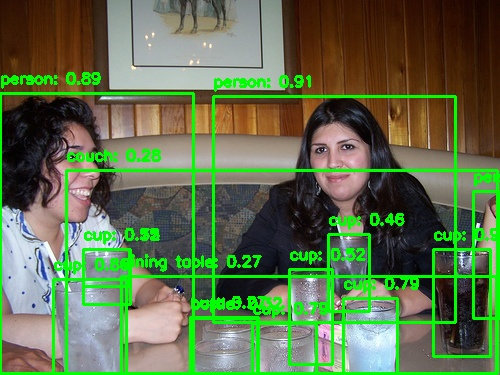

In [131]:
output_file = 'detected_image_000035.jpg'
cv2.imwrite(output_file, image)
display(Image(filename = output_file))


0: 480x640 3 teddy bears, 64.8ms
Speed: 2.7ms preprocess, 64.8ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


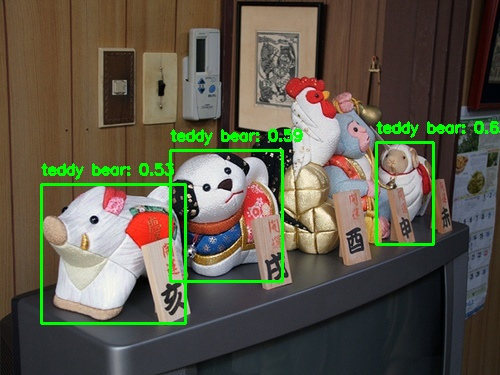


0: 640x480 1 bird, 64.6ms
Speed: 1.8ms preprocess, 64.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


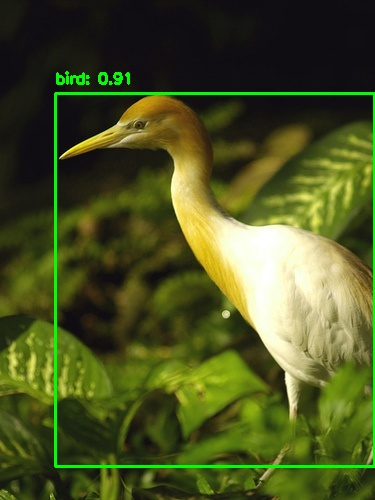


0: 448x640 1 person, 1 horse, 56.8ms
Speed: 1.6ms preprocess, 56.8ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


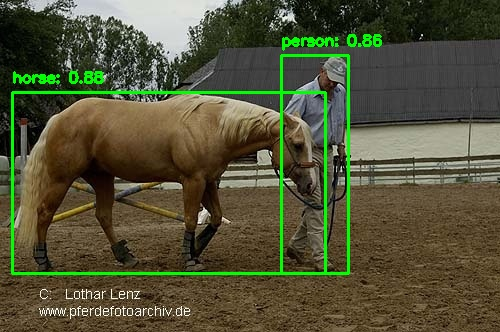


0: 480x640 1 person, 1 horse, 59.2ms
Speed: 1.8ms preprocess, 59.2ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


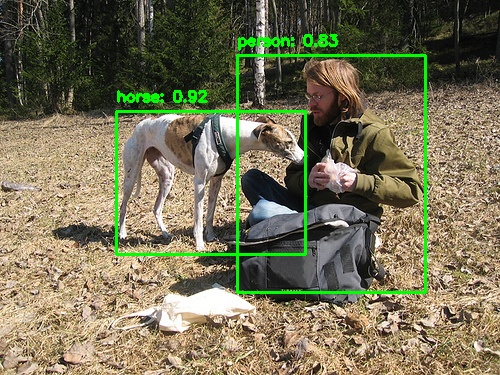


0: 480x640 4 persons, 3 bicycles, 1 car, 58.9ms
Speed: 1.9ms preprocess, 58.9ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


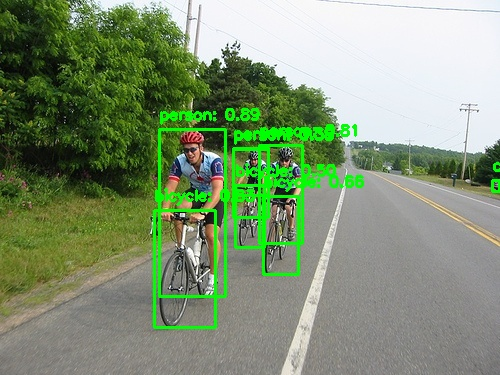


0: 480x640 2 trains, 54.4ms
Speed: 1.8ms preprocess, 54.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


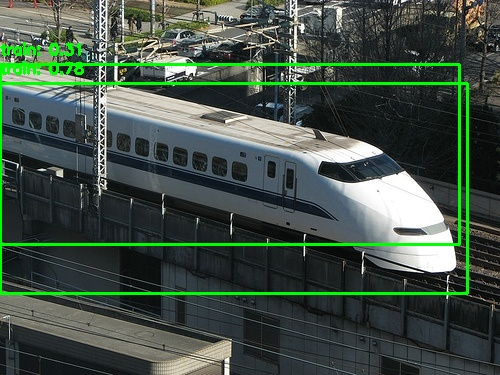


0: 480x640 2 persons, 2 wine glasss, 2 cups, 3 dining tables, 120.3ms
Speed: 2.2ms preprocess, 120.3ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


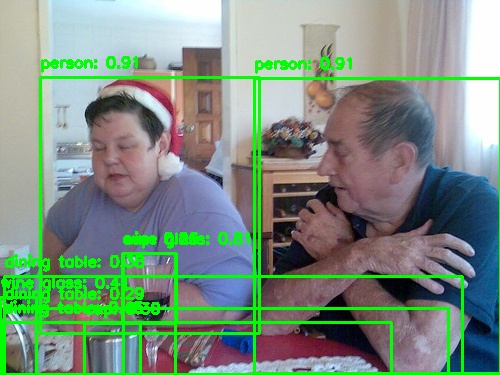


0: 640x512 2 bottles, 3 oranges, 67.2ms
Speed: 1.9ms preprocess, 67.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 512)


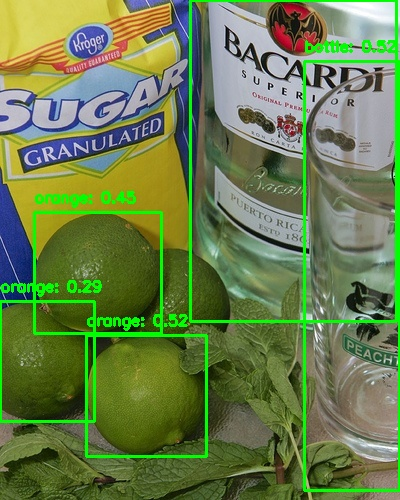


0: 480x640 9 persons, 2 cars, 4 motorcycles, 58.3ms
Speed: 1.9ms preprocess, 58.3ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


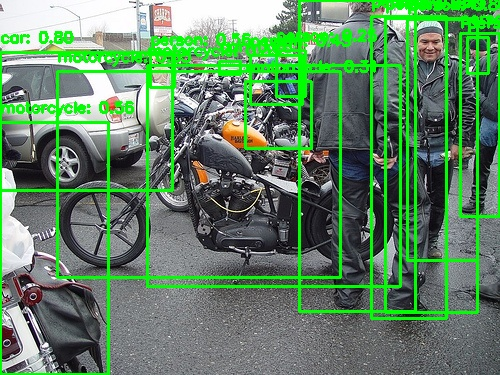


0: 448x640 1 boat, 52.4ms
Speed: 1.8ms preprocess, 52.4ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


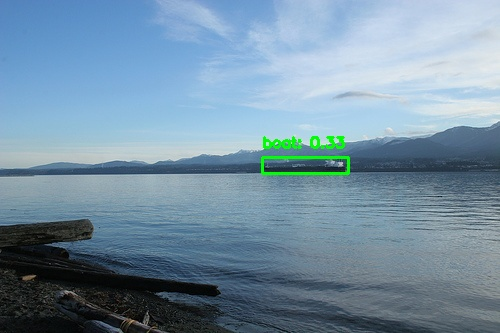

In [137]:
# Testing for multiple images
import random

src_path = region + '/data/data_images'
jpg_image_list = glob(src_path + '/*.jpg')

random_items = random.sample(jpg_image_list, 10)

for image_file in random_items:
    image = cv2.imread(image_file)
    output_filename = os.path.basename(image_file)
    output_filename = "detected_" + output_filename

    row, col, d = image.shape
    max_rc = max(row, col)

    input_image = np.zeros((max_rc, max_rc, 3), dtype=np.uint8)
    input_image[0:row, 0:col] = image

    INPUT_WIDTH_YOLO = 640
    blob = cv2.dnn.blobFromImage(input_image, 1/255, (INPUT_WIDTH_YOLO,INPUT_WIDTH_YOLO), swapRB=True, crop=False)

    model = yolo('yolov8n.pt')
    results = model(image)

#########

    for result in results:
        boxes = result.boxes.cpu().numpy()
        names = result.names

        for box in boxes:
            xyxy = box.xyxy.astype(int)[0]
            confidence = box.conf[0]
            class_id = box.cls[0]
            class_name = names[class_id]

            cv2.rectangle(image, (xyxy[0], xyxy[1]), (xyxy[2], xyxy[3]), (0, 255, 0), 2)

            label = f'{class_name}: {confidence:.2f}'
            cv2.putText(image, label, (xyxy[0], xyxy[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    #output_file = 'detected_image_000035.jpg'
    cv2.imwrite(output_filename, image)
    display(Image(filename=output_filename))

    #cv2.imwrite(output_file, image)
    #display(Image(filename = imageName))


In [139]:
ls

01_extract_object_info_from_xml.ipynb  detected_005481.jpg
01_extract_object_info_from_xml.py     detected_006697.jpg
data_image/                            detected_006814.jpg
data_images/                           detected_007092.jpg
data.yaml                              detected_007946.jpg
detected_001927.jpg                    detected_image_000035.jpg
detected_002139.jpg                    drone.yaml
detected_004359.jpg                    IRS_channel_extimation.ipynb
detected_004604.jpg                    yolov8n.pt
detected_005370.jpg
